# Grid Search

In this demo we'll see how to search for the best combination of hyperparameters using grid search.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

For this demo, I'm going to create a synthetic dataset consisting of 10,000 rows, 10 features and two classes for a classification task. You can think of the two classes as buy and sell predictions and the 10 features as technical indicators, macroeconomic and fundamentals data or any other type of financial data that might be relevant to price movements on each day. And the 10,000 rows correspond to 10,000 samples we've collected for these features.


In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10_000, n_classes=2, n_features=20, n_informative=5, n_redundant=15, hypercube=False, n_clusters_per_class=3, flip_y=0.2, class_sep=0.5, random_state=52)

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.099326,-0.132357,0.098467,0.190470,-0.087828,0.084519,-0.060929,-0.001090,-0.032092,-0.103035,0.205428,0.148757,-0.163128,-0.218731,-0.311388,-0.067658,-0.108823,0.025651,-0.114318,-0.093880
std,1.706856,1.571521,1.316362,2.211578,1.279586,1.673883,1.347042,1.522295,1.266772,1.882075,1.588771,1.432652,1.985666,1.383041,2.359927,1.395099,1.985307,0.855623,1.344010,1.876238
min,-9.430871,-6.747077,-5.188381,-10.685040,-4.694201,-8.192896,-6.105705,-6.697295,-6.925078,-8.718655,-8.296950,-6.712927,-7.790147,-7.044948,-11.542792,-6.796997,-10.558834,-4.371106,-7.481004,-10.143031
25%,-0.889346,-1.022959,-0.742529,-1.102792,-0.896821,-0.848257,-0.878811,-0.965112,-0.818984,-1.331327,-0.750679,-0.793859,-1.474019,-1.072058,-1.782664,-0.964881,-1.301056,-0.478325,-0.918861,-1.288215
50%,0.155030,-0.132078,0.071048,0.223525,-0.102153,0.078043,-0.061611,-0.012091,-0.039386,-0.078935,0.244986,0.143946,-0.199720,-0.220715,-0.271857,-0.081175,-0.152453,0.029337,-0.113138,-0.163626
75%,1.119974,0.769528,0.909750,1.435452,0.725897,1.019399,0.774285,0.963669,0.742456,1.129630,1.214623,1.077005,1.141882,0.666474,1.229063,0.805792,1.017792,0.542513,0.710495,1.044464
max,8.027462,8.309730,6.874369,10.436079,5.757400,7.065807,7.080327,7.372481,6.838774,8.783723,6.635210,5.620205,8.449321,5.889819,12.219560,6.560061,12.796569,4.725883,6.394562,8.775519


Let's use a support vector classifier this time, so we're gonna have to make sure our features are scaled.  
As usual we split the dataset into training and test sets first. Let's use 30% for testing and 70% for training. Let's pretend this is temporal data so we won't shuffle it.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now before I show you grid search, let's just train this classifier using its default hyperparameter values and see the results so we have a reference point.


In [13]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

SVC()

I'm just going to use the same code we used in a previous demo to get the training, cross-validation and test scores.


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
mean_cv_score_clf = np.mean(cv_scores)
print(f"Cross-Validated Accuracy: {mean_cv_score_clf:.4f}")

y_pred_clf = clf.predict(X_test)
test_score_clf = accuracy_score(y_test, y_pred_clf)
print(f"Test Accuracy: {test_score_clf:.4f}")

Cross-Validated Accuracy: 0.7310
Test Accuracy: 0.7233


And while we're at it, let's take a look at the learning curves as well.

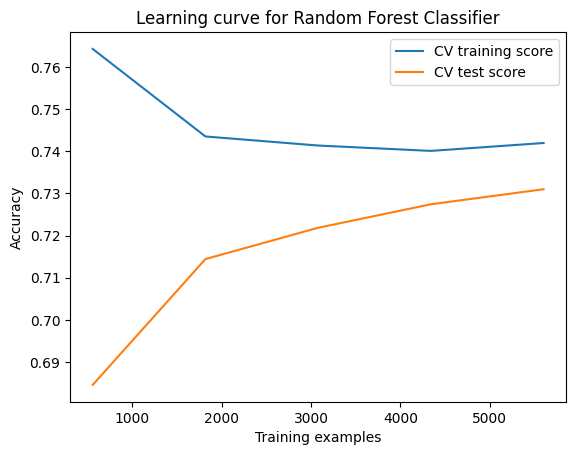

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5, n_jobs=-1):
    ax = plt.gca()
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label="CV training score")
    plt.plot(train_sizes, test_scores_mean, label="CV test score")
    plt.title("Learning curve for Random Forest Classifier")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_learning_curve(clf, X_train, y_train)

The curves are converging. They look good. There's no warning sign of severe over or underfitting.  
But can we do better? We could manually play around with the various hyperparameters one at a time... after all we know their general effects on bias and variance. But let's do things more cleanly and systematically by throwing a few of the main hyperparameters into a grid search...  
You may recall that C is the strength of regularization and it can be any positive number. It's 1 by default but let's try an order of magnitude above and below that.  
Here's another hyperparameter: the kernel function used by SVC. By default it uses RBF (Radial basis function). But there are other options which we can read up on in the documentation. Let's try a few others, say, linear and polynomial as well.

In [16]:
from sklearn.model_selection import GridSearchCV

search_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf"],
}

search = GridSearchCV(estimator=clf, param_grid=search_grid, cv=5, scoring="accuracy", n_jobs=-1)

search.fit(
    X_train,
    y_train,
)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

Let's check the results...

In [17]:
best_params = search.best_params_
best_score = search.best_score_
best_model = search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Evaluate on the test set
test_score = search.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")


Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.7377
Test set score: 0.7310


We were able to eke out a few tenths of a percentage point from the CV score! By the way there are ways to inspect the results more closely. Let me show you a few of them...

In [18]:
results = pd.DataFrame(search.cv_results_)
results.sort_values("rank_test_score", inplace=True)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1.301817,0.075267,0.259467,0.023845,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.740000,0.730000,0.734286,0.726429,0.757857,0.737714,0.011042,1
5,1.172196,0.089073,0.309853,0.026374,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.732143,0.718571,0.736429,0.726429,0.741429,0.731000,0.007936,2
2,1.313284,0.098592,0.363462,0.024891,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.692857,0.705714,0.702857,0.711429,0.717857,0.706143,0.008398,3
7,3.688655,0.109089,0.131438,0.004080,10.0,poly,"{'C': 10, 'kernel': 'poly'}",0.609286,0.633571,0.614286,0.624286,0.623571,0.621000,0.008459,4
4,1.888022,0.213292,0.192862,0.035128,1.0,poly,"{'C': 1, 'kernel': 'poly'}",0.605714,0.630000,0.618571,0.630000,0.620000,0.620857,0.008972,5


Since we only tuned two hyperparameters we can even visualize the CV scores on a heatmap.

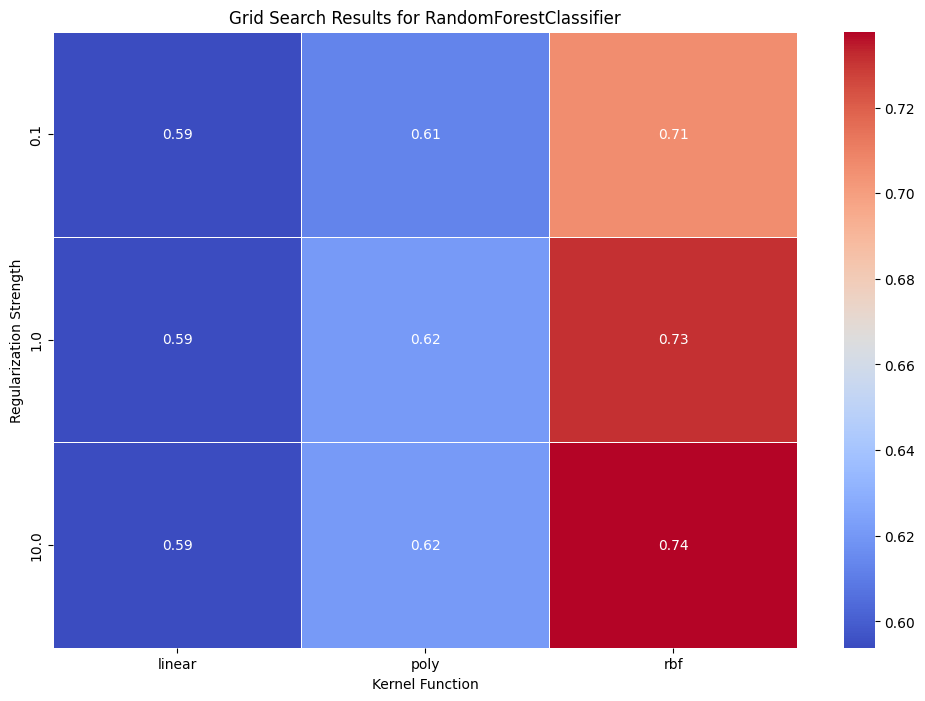

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    data=results.pivot_table(
        index="param_C", columns="param_kernel", values="mean_test_score"
    ),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.xlabel("Kernel Function")
plt.ylabel("Regularization Strength")
plt.title("Grid Search Results for RandomForestClassifier")
plt.show()

And we can even get the best model that was found, which is already fitted, and directly use it for prediction or anything else you'd use a trained model for! Let's use it to plot and inspect _its_ learning curves.

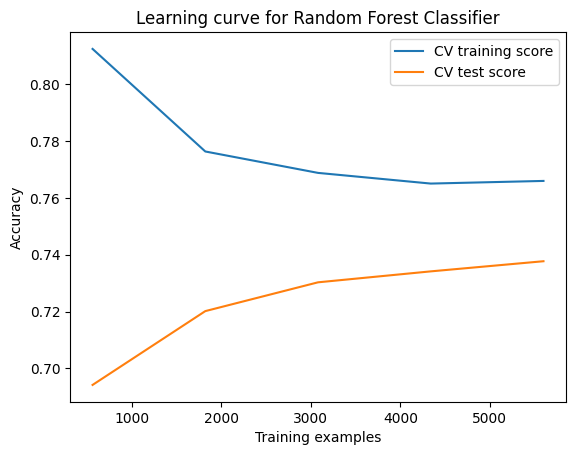

In [20]:
plot_learning_curve(best_model, X_train, y_train)

Of course SVCs have a few more tunable hyperparameters. We can get a list of them using the `get_params()` method which is a callable on all sklearn estimators...

In [21]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Not _all_ are relevant to hyperparameter tuning. For example you can see some of them are more operational settings. But anyway, in principle, we can continue and fine-tune our search. For example, now that we know the linear kernel seems suboptimal, we might drop it or replace it with another. Or we might choose to throw a couple of other hyperparameters into the mix and tune them.

In [24]:
search_grid = {
    "C": [5, 10, 20],
    "kernel": ["poly", "rbf"],
    "degree": [2, 3, 4, 5],
}

search = GridSearchCV(estimator=clf, param_grid=search_grid, cv=5, scoring="accuracy", n_jobs=-1)
search.fit(X_train, y_train)

/home/farid/.pyenv/versions/3.10.6/envs/udacity/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5, 10, 20], 'degree': [2, 3, 4, 5],
                         'kernel': ['poly', 'rbf']},
             scoring='accuracy')

In [25]:
best_params = search.best_params_
best_score = search.best_score_
best_model = search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Evaluate on the test set
test_score = search.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")


Best parameters: {'C': 20, 'degree': 2, 'kernel': 'rbf'}
Best cross-validation score: 0.7396
Test set score: 0.7317
